In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_raw = cv2.imread('data/images/mandrill_colour.png')

In [3]:
type(img_raw)

In [4]:
img_raw.shape

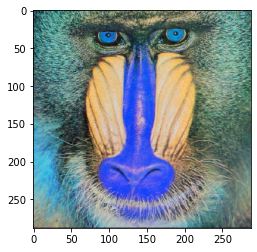

In [5]:
plt.imshow(img_raw)

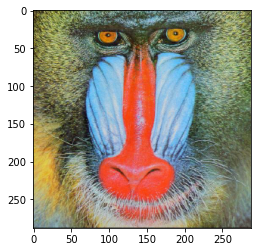

In [6]:
img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [7]:
import cv2
img = cv2.imread('data/images/mandrill_colour.png')
while True:
    cv2.imshow('mandrill',img)

    if cv2.waitKey(1) & 0xFF == 27:
        break


cv2.destroyAllWindows()

In [8]:
cv2.imwrite('data/images/final_image.png',img)

True

In [9]:
image_blank = np.zeros(shape=(512,512,3),dtype=np.int16)

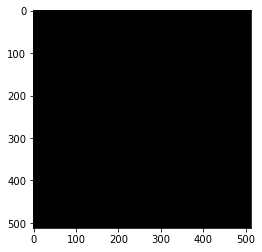

In [10]:
plt.imshow(image_blank)

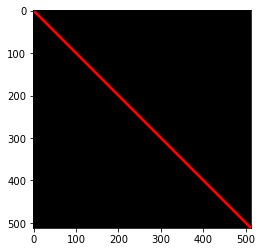

In [11]:
line_red = cv2.line(image_blank,(0,0),(511,511),(255,0,0),5)
plt.imshow(line_red)


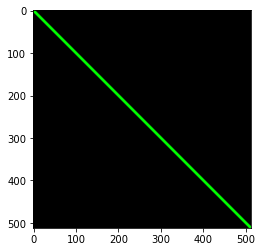

In [12]:
line_green = cv2.line(image_blank,(0,0),(511,511),(0,255,0),5)
plt.imshow(line_green)

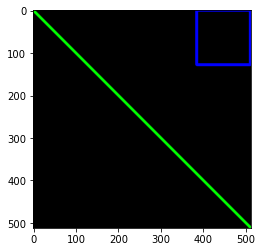

In [13]:
rectangle= cv2.rectangle(line_green,(384,0),(510,128),(0,0,255),5)
plt.imshow(rectangle)

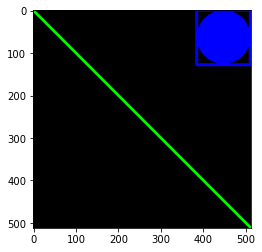

In [14]:
circle = cv2.circle(rectangle,(447,63), 63, (0,0,255), -1) # -1 corresponds to a filled circle
plt.imshow(circle)

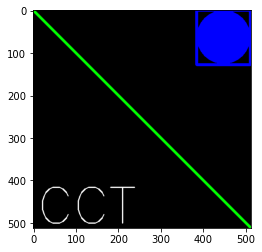

In [15]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(circle,'CCT',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
plt.imshow(text)

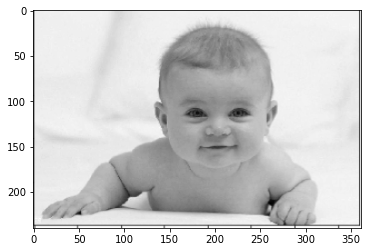

In [16]:
#Loading the image to be tested
test_image = cv2.imread('data/images/baby1.png')

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')


In [17]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [18]:
test_image_color = convertToRGB(test_image)

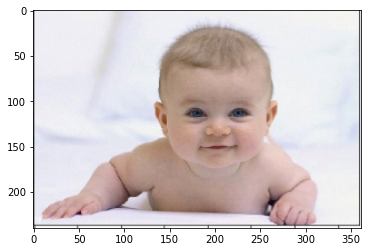

In [19]:
plt.imshow(test_image_color)

In [20]:
haar_cascade_face = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

In [21]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

In [22]:
print('Faces found: ', len(faces_rects))

Faces found:  1


In [23]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)


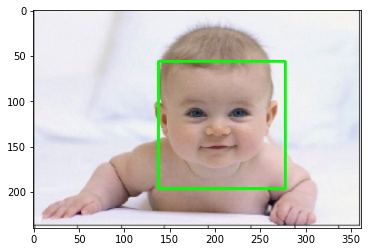

In [24]:
plt.imshow(convertToRGB(test_image))

In [25]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)

    return image_copy


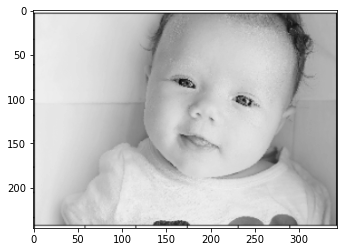

In [26]:
test_image2 = cv2.imread('data/images/baby2.png')

# Converting to grayscale
test_image_gray = cv2.cvtColor(test_image2, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')


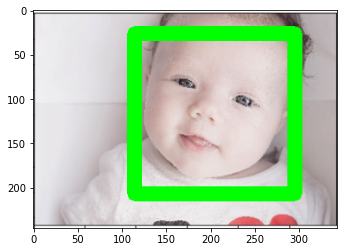

In [27]:
#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

In [28]:
#loading image
test_image3 = cv2.imread('data/images/test_group.jpg')

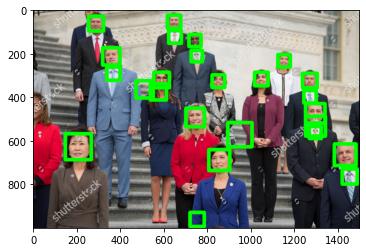

In [29]:

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image3)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))